**Projet 6: Analysez les ventes d'une librairie avec R ou Python**

**Mission:**

1.   [présenter les différents indicateurs et graphiques autour du chiffre d'affaires, voir l’évolution dans le temps et mettre en place une
décomposition en moyenne mobile pour évaluer la tendance globale](#scrollTo=XiWGYHcRuPY4)
2.   [faire un zoom sur les références, pour voir un peu les tops et les
flops, la répartition par catégorie, etc.](#scrollTo=Gr7hWmKJYFcY&line=1&uniqifier=1)
3.   [quelques informations sur les profils de nos clients, et également la
répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz](#scrollTo=nBlqBxz0ezSE&line)
4.   [le lien entre le genre d’un client et les catégories des livres achetés](#scrollTo=rRbz0XlDXFQh&line=1&uniqifier=1)
5.   [le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés](#scrollTo=1KIjIj6WbtA7)
6.  [le lien entre le genre et le chiffre d'affaires](#scrollTo=p7ubRY2vUg76) 


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import scipy.stats as st
import datetime as dt

# **Préparation des données**

In [3]:
working_directory= '/content/gdrive/MyDrive/Colab Notebooks'

In [4]:
transactions= pd.read_csv(os.path.join(working_directory, 'transactions.csv'))
products= pd.read_csv(os.path.join(working_directory, 'products.csv'))
customers= pd.read_csv(os.path.join(working_directory, 'customers.csv'))


In [5]:
display(products)


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [6]:
display(products.shape)
display(products.info())
products.describe()

(3287, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


None

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [7]:
display(customers)


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [8]:
display(customers.shape)
display(customers.info())

(8623, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


None

In [9]:
display(transactions)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [10]:
display(transactions.shape)
display(transactions.describe())
display(transactions.info())

(679532, 4)

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


None

A la recherche de 'price'==-1 et tout ce qui est lié à cela

In [11]:
display(products.loc[products['price']==-1])
display(products.loc[products['id_prod']=='T_0'])

,id_prod,price,categ
731,T_0,-1.0,0


,id_prod,price,categ
731,T_0,-1.0,0


In [12]:
#suppression des données
products=products.loc[products['price']!=-1]

In [13]:
products.loc[products['price']<0]

,id_prod,price,categ


In [14]:
products.shape

(3286, 3)

In [15]:
display(transactions.loc[transactions['id_prod']=='T_0'])

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [16]:
display(transactions.duplicated().sum())
duplicateRows = transactions[transactions.duplicated()]
display(duplicateRows)
transactions.loc[transactions.duplicated(keep=False),:]


126

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [17]:
display(customers.loc[(customers['client_id']=='ct_1') | (customers['client_id']=='ct_0')])

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [18]:
#suppression des données
customers=customers.loc[~((customers['client_id']=='ct_1') | (customers['client_id']=='ct_0'))]

In [19]:
customers.shape

(8621, 3)

In [20]:
display(transactions.loc[(transactions['client_id']=='ct_1') | (transactions['client_id']=='ct_0')])


,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [21]:
transactions_test= transactions.loc[transactions['date'].str.contains("test")]
display(transactions_test)

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [22]:
#suppression des données
transactions=transactions.loc[~((transactions['client_id']=='ct_1') | (transactions['client_id']=='ct_0'))]
transactions.shape

(679332, 4)

**Changement du type de donnée 'time'**

In [23]:
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d %H:%M:%S')

<Axes: >

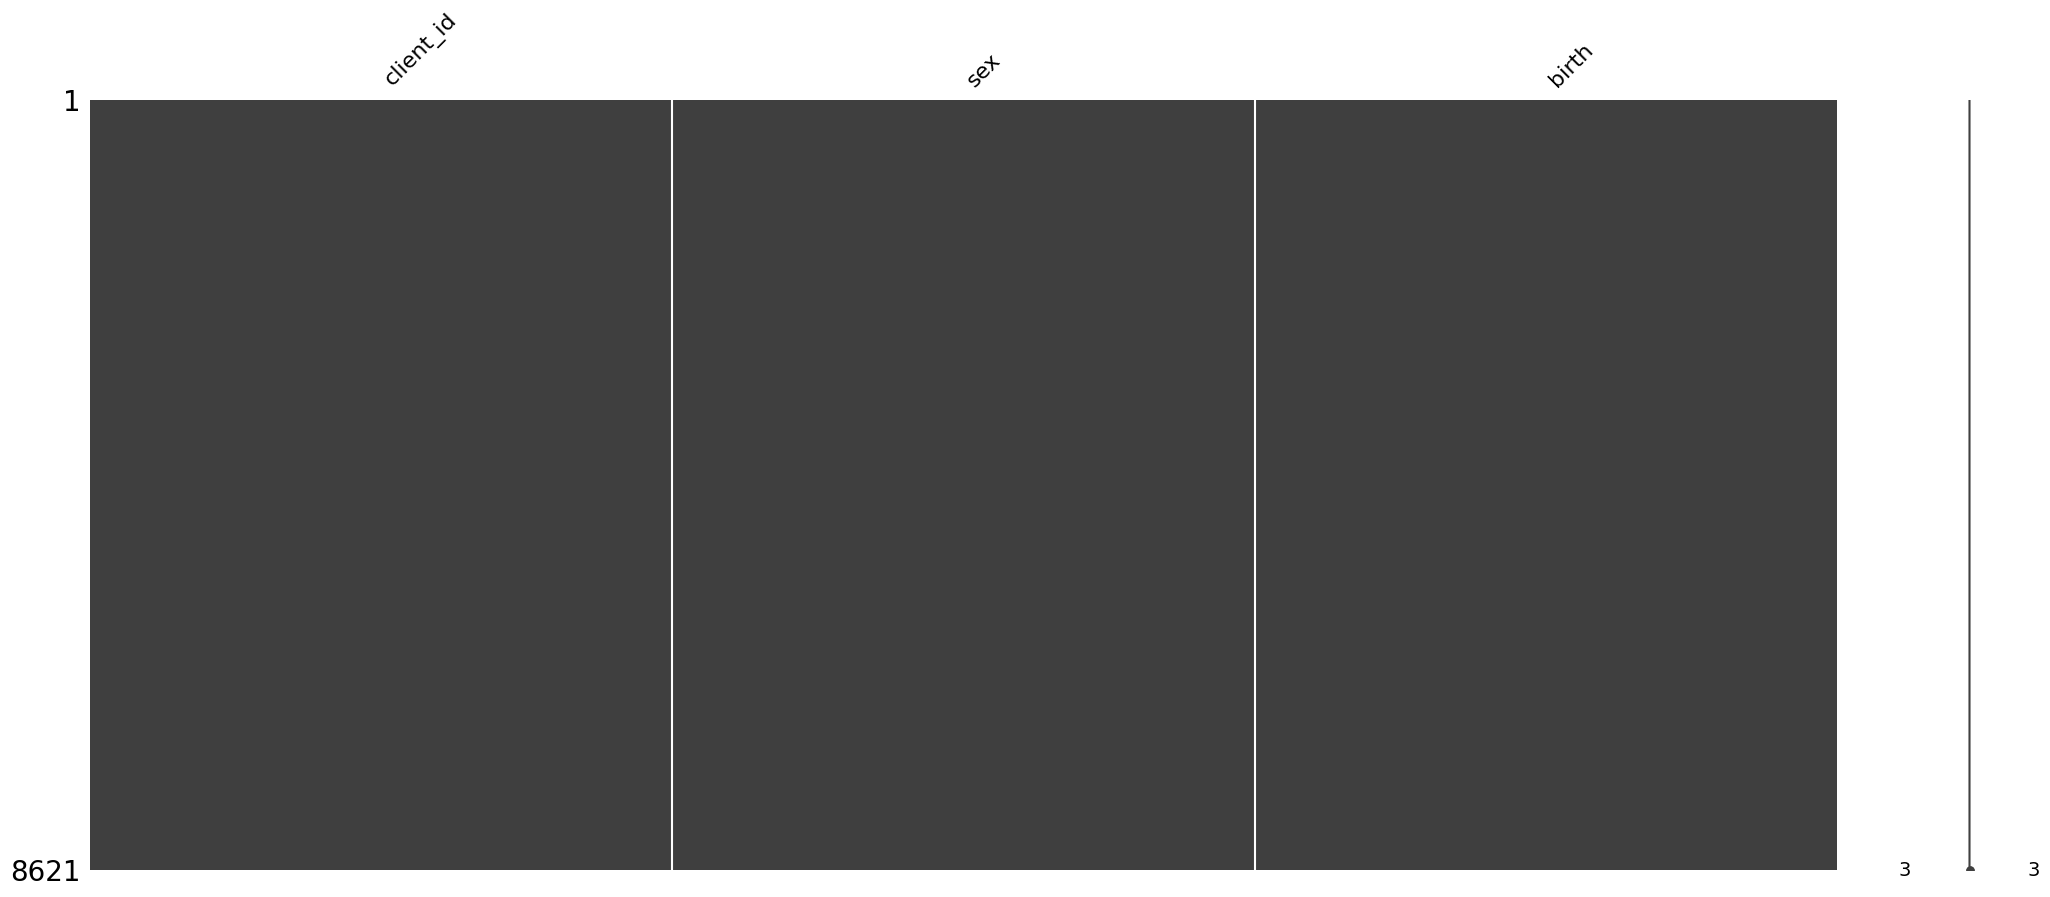

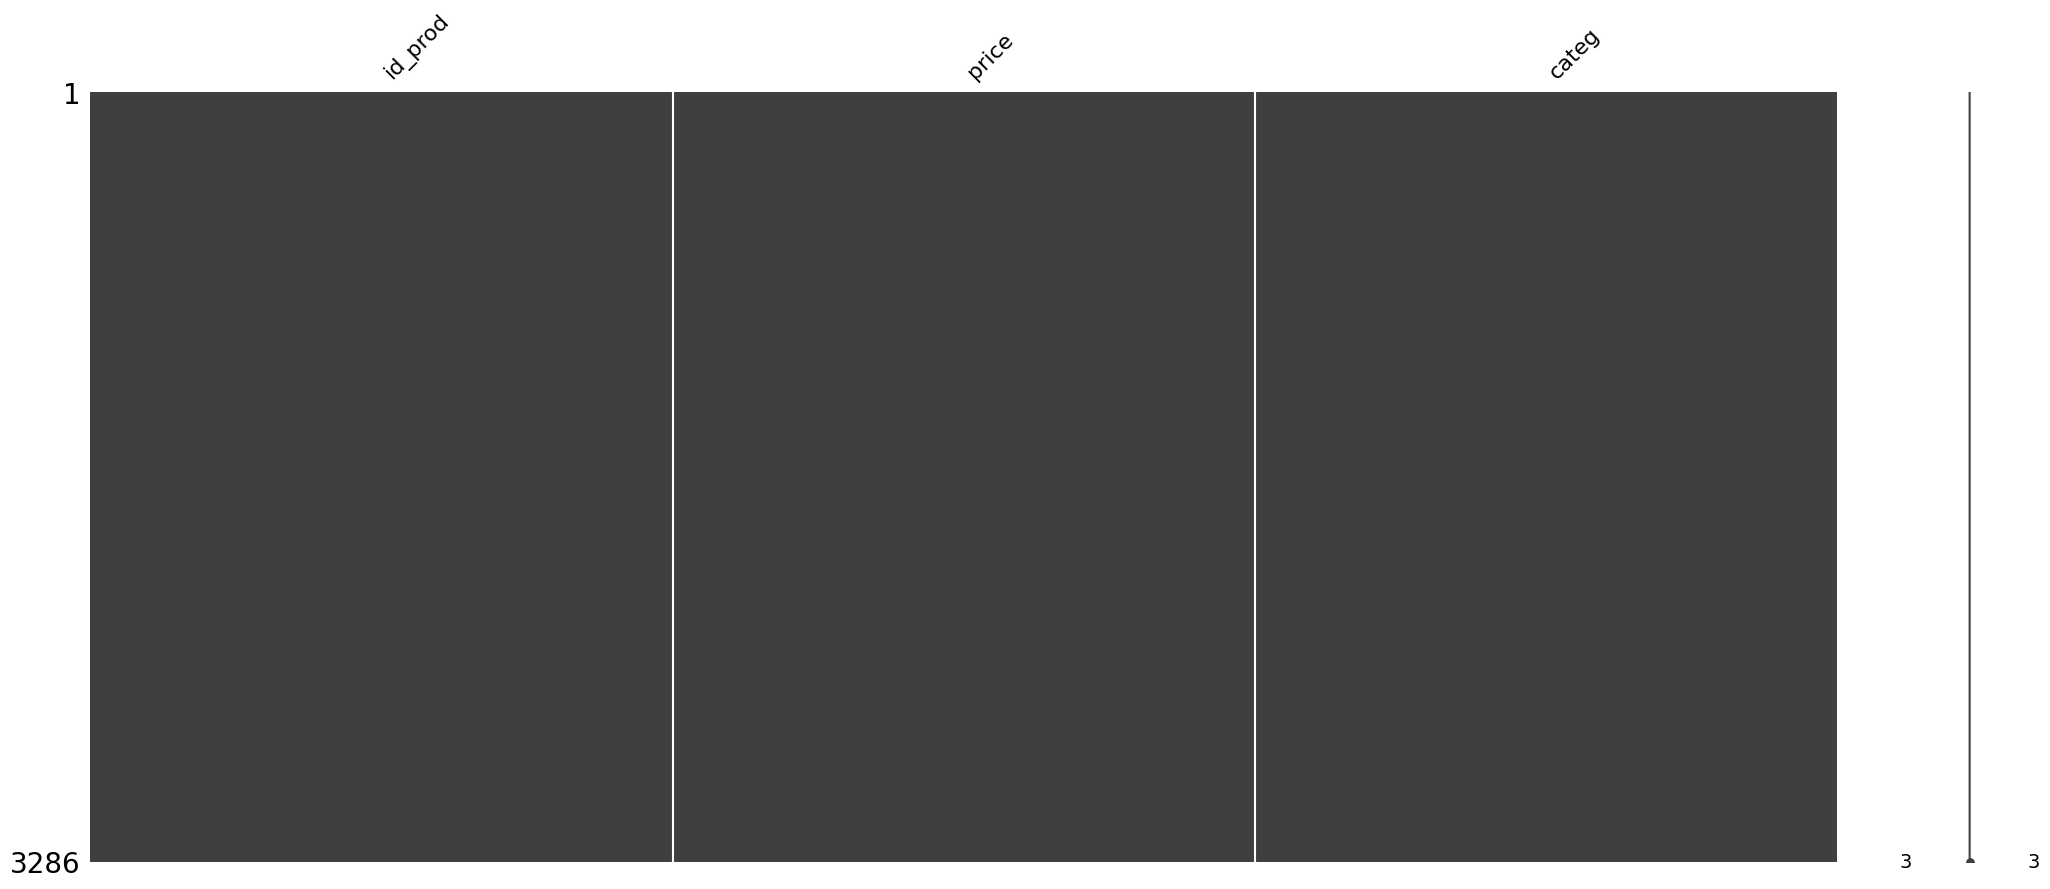

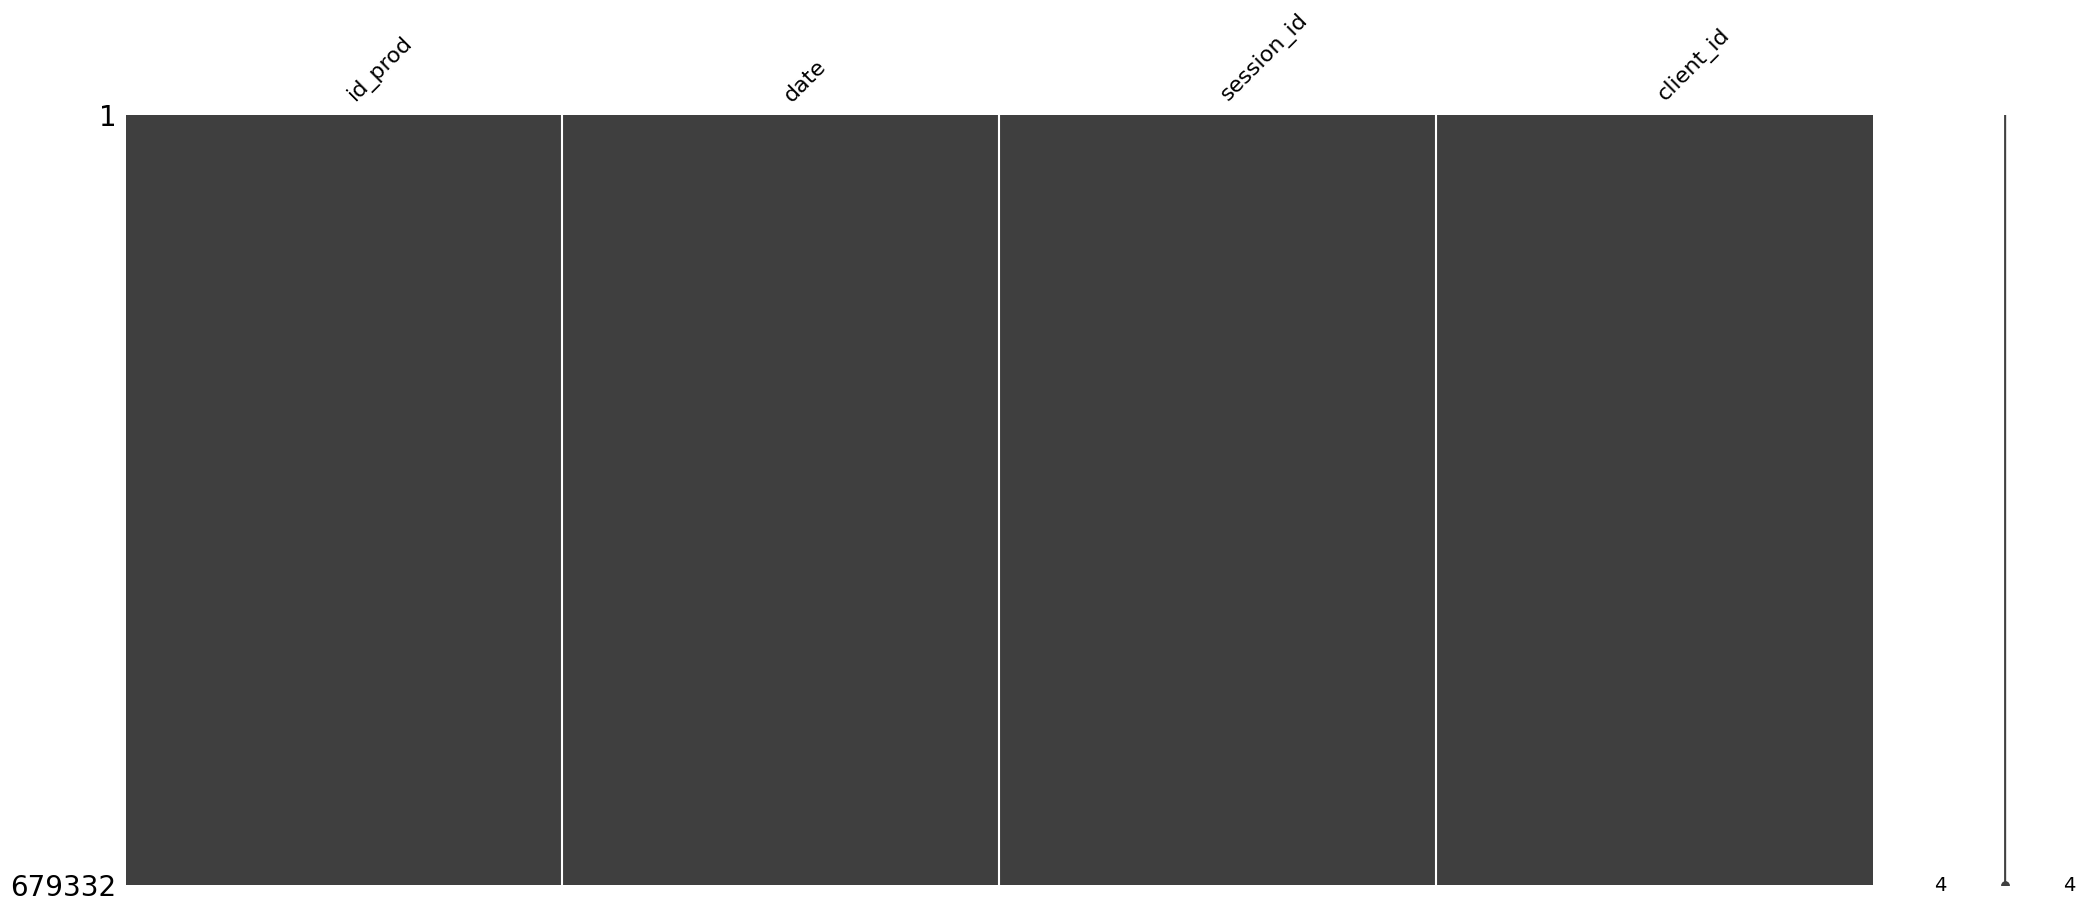

In [24]:
import missingno as msno
msno.matrix(customers)
msno.matrix(products)
msno.matrix(transactions)

In [25]:
products.groupby('categ').count()

,id_prod,price
categ,,
0,2308,2308
1,739,739
2,239,239


**Jointure des tables**

In [26]:
def testerCle(df, colonnes):
    """Fonction qui prend en arguments un dataframe et les colonnes qui composent la clé primaire à tester."""

    # On compare la taille du dataframe avant et après dédoublonnage 
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.")
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.")
    
    # On renvoie également le comptage
    print("Le dataframe est de la forme : " + str(df.shape) + " (lignes, colonnes)", '\n','\n')

In [27]:
testerCle(products, 'id_prod')
testerCle(customers, 'client_id')

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (3286, 3) (lignes, colonnes) 
 

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (8621, 3) (lignes, colonnes) 
 



In [28]:
data1= pd.merge(transactions, customers, on='client_id', indicator=True, how='outer')
display(data1)
print(data1['_merge'].value_counts())

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986,both
...,...,...,...,...,...,...,...
679348,NaN,NaT,NaN,c_862,f,1956,right_only
679349,NaN,NaT,NaN,c_7584,f,1960,right_only
679350,NaN,NaT,NaN,c_90,m,2001,right_only
679351,NaN,NaT,NaN,c_587,m,1993,right_only


both          679332
right_only        21
left_only          0
Name: _merge, dtype: int64


In [29]:
data1.loc[data1['_merge']=='right_only']
#Catégorie des personnes enregistées mais jamais rien achetées

,id_prod,date,session_id,client_id,sex,birth,_merge
679332,NaN,NaT,NaN,c_8253,f,2001,right_only
679333,NaN,NaT,NaN,c_3789,f,1997,right_only
679334,NaN,NaT,NaN,c_4406,f,1998,right_only
679335,NaN,NaT,NaN,c_2706,f,1967,right_only
679336,NaN,NaT,NaN,c_3443,m,1959,right_only
679337,NaN,NaT,NaN,c_4447,m,1956,right_only
679338,NaN,NaT,NaN,c_3017,f,1992,right_only
679339,NaN,NaT,NaN,c_4086,f,1992,right_only
679340,NaN,NaT,NaN,c_6930,m,2004,right_only
679341,NaN,NaT,NaN,c_4358,m,1999,right_only


In [30]:
#suppression des données
data1=data1.loc[data1['_merge']!='right_only']
data1.shape

(679332, 7)

In [31]:
data1=data1.drop(columns='_merge')

In [32]:
data= pd.merge(data1, products, on='id_prod', indicator=True, how='outer')
display(data)
print(data['_merge'].value_counts())

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...
679348,0_1624,NaT,NaN,NaN,NaN,NaN,24.50,0.0,right_only
679349,2_86,NaT,NaN,NaN,NaN,NaN,132.36,2.0,right_only
679350,0_299,NaT,NaN,NaN,NaN,NaN,22.99,0.0,right_only
679351,0_510,NaT,NaN,NaN,NaN,NaN,23.66,0.0,right_only


both          679111
left_only        221
right_only        21
Name: _merge, dtype: int64


In [33]:
data.loc[data['_merge']=='left_only']
# id_prod = 0_2245 ni le prix ni la catégorie ne sont pas renseignés.  Préciser que le CA est sous-évalué car pas de prix pour un produit



,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968.0,NaN,NaN,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968.0,NaN,NaN,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968.0,NaN,NaN,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968.0,NaN,NaN,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,NaN,NaN,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,NaN,NaN,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,NaN,NaN,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,NaN,NaN,left_only


In [34]:
data_produits_jamais_achetes= data.loc[data['_merge']=='right_only']
display(data_produits_jamais_achetes)
display(data_produits_jamais_achetes.groupby(['categ'])['categ'].value_counts())
# Produits jamais achetés

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
679332,0_1016,NaT,NaN,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaT,NaN,NaN,NaN,NaN,1.67,0.0,right_only
679334,0_1062,NaT,NaN,NaN,NaN,NaN,20.08,0.0,right_only
679335,0_1119,NaT,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679336,0_1014,NaT,NaN,NaN,NaN,NaN,1.15,0.0,right_only
679337,1_0,NaT,NaN,NaN,NaN,NaN,31.82,1.0,right_only
679338,0_1318,NaT,NaN,NaN,NaN,NaN,20.92,0.0,right_only
679339,0_1800,NaT,NaN,NaN,NaN,NaN,22.05,0.0,right_only
679340,0_1645,NaT,NaN,NaN,NaN,NaN,2.99,0.0,right_only
679341,0_322,NaT,NaN,NaN,NaN,NaN,2.99,0.0,right_only


categ  categ
0.0    0.0      16
1.0    1.0       2
2.0    2.0       3
Name: categ, dtype: int64

In [35]:
#suppression des données
data= data.loc[data['_merge']!='right_only']
data.shape

(679332, 9)

In [36]:
data.describe()

,birth,price,categ
count,679332.000000,679111.000000,679111.000000
mean,1977.811139,17.454773,0.441953
std,13.574553,18.328998,0.595042
min,1929.000000,0.620000,0.000000
25%,1970.000000,8.870000,0.000000
50%,1980.000000,13.990000,0.000000
75%,1987.000000,18.990000,1.000000
max,2004.000000,300.000000,2.000000


**Dataframe finale**

In [37]:
display(data)
display(data['categ'].unique())
data.sort_values('categ')

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...
679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0,both
679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0,both
679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0,both
679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0,both


array([ 0.,  1.,  2., nan])

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
303863,0_1396,2022-09-21 23:40:18.973252,s_271553,c_3378,m,1972.0,9.57,0.0,both
303862,0_1396,2021-09-21 23:40:18.973252,s_93466,c_3378,m,1972.0,9.57,0.0,both
303861,0_1396,2021-10-14 22:45:44.207210,s_104845,c_4511,f,1977.0,9.57,0.0,both
303860,0_1396,2022-02-19 11:16:37.914946,s_167578,c_7768,m,1973.0,9.57,0.0,both
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986.0,NaN,NaN,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933.0,NaN,NaN,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987.0,NaN,NaN,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987.0,NaN,NaN,left_only


In [38]:
print(data['_merge'].value_counts())

both          679111
left_only        221
right_only         0
Name: _merge, dtype: int64


In [39]:
data.duplicated().sum()

0

In [40]:
data.reset_index(inplace=True)
data.rename(columns={'index': 'id_transaction'}, inplace=True)
display(data)

,id_transaction,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both
1,1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both
2,2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both
3,3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both
4,4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both
...,...,...,...,...,...,...,...,...,...,...
679327,679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0,both
679328,679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0,both
679329,679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0,both
679330,679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0,both


# **Chiffre d'affaires (période de 2 ans)**

**Chiffre d'affaires par client**

In [41]:
data_ca_client=data.groupby(['client_id','sex','birth'])['price'].sum().reset_index()
data_ca_client.rename(columns={'price': 'CA_par_client'}, inplace=True)
display(data_ca_client)

,client_id,sex,birth,CA_par_client
0,c_1,m,1955.0,558.18
1,c_10,m,1956.0,1353.60
2,c_100,m,1992.0,254.85
3,c_1000,f,1966.0,2261.89
4,c_1001,m,1982.0,1812.86
...,...,...,...,...
8595,c_995,m,1955.0,189.41
8596,c_996,f,1970.0,1625.58
8597,c_997,f,1994.0,1490.01
8598,c_998,m,2001.0,2779.88


Les flops

In [42]:
display(data_ca_client.sort_values(by='CA_par_client', ascending=True).head(10))

,client_id,sex,birth,CA_par_client
8151,c_8351,f,1968.0,6.31
7918,c_8140,m,1971.0,8.30
7889,c_8114,m,1962.0,9.98
1556,c_240,m,1998.0,11.06
4044,c_4648,m,2004.0,11.20
3855,c_4478,f,1970.0,13.36
5501,c_5962,f,1997.0,13.99
5589,c_6040,f,1974.0,15.72
5453,c_5919,f,1955.0,15.98
5354,c_5829,f,1989.0,16.07


Les tops

In [43]:
display(data_ca_client.sort_values(by='CA_par_client', ascending=False).head(10))


,client_id,sex,birth,CA_par_client
677,c_1609,m,1980.0,324033.35
4388,c_4958,m,1999.0,289760.34
6337,c_6714,f,1968.0,153598.92
2724,c_3454,m,1969.0,113637.93
2513,c_3263,f,1985.0,5276.87
634,c_1570,f,1979.0,5271.62
2108,c_2899,f,1994.0,5214.05
1268,c_2140,f,1977.0,5208.82
7006,c_7319,f,1974.0,5155.77
7715,c_7959,f,1974.0,5085.45


In [44]:
#CA apporté par 1 client en moyenne (sans compter des clients qui ont jamais fait des achats) +médiane
print(data_ca_client['CA_par_client'].mean())
data_ca_client['CA_par_client'].median()

1378.3405441860464


1027.02

In [45]:
#Période
display(data['date'].max())
data['date'].min()

Timestamp('2023-02-28 23:58:30.792755')

Timestamp('2021-03-01 00:01:07.843138')

**Chiffre d'affaires total**

In [46]:
round(data_ca_client['CA_par_client'].sum(), 2)


11853728.68

In [47]:
#CA apporté par 1 client en moyenne (avec des clients qui ont jamais fait des achats)
b=data_ca_client['CA_par_client'].sum()/8622
print(b)

1374.8235536998375


**Chiffre d'affaires par jour/mois/année**

In [48]:
data['jour_transaction'] = data['date'].dt.date
data['mois-annee'] = data['date'].dt.to_period("M")
data['annee'] = [t.year for t in data.date]
display(data)

,id_transaction,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge,jour_transaction,mois-annee,annee
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both,2022-05-20,2022-05,2022
1,1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both,2021-07-20,2021-07,2021
2,2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both,2022-08-20,2022-08,2022
3,3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both,2021-05-09,2021-05,2021
4,4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both,2022-05-30,2022-05,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0,both,2023-01-26,2023-01,2023
679328,679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0,both,2022-11-26,2022-11,2022
679329,679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0,both,2021-09-26,2021-09,2021
679330,679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0,both,2022-02-19,2022-02,2022


In [49]:
data_ca_jour= data.groupby('jour_transaction')[['price']].sum().reset_index()
data_ca_jour.rename(columns={'price': 'CA_par_jour'}, inplace=True)
display(data_ca_jour)


,jour_transaction,CA_par_jour
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


In [50]:
data_ca_jour2= data.groupby('jour_transaction')[['price']].mean()
display(data_ca_jour2)

,price
jour_transaction,
2021-03-01,17.219563
2021-03-02,16.492492
2021-03-03,16.683524
2021-03-04,16.828427
2021-03-05,18.527434
...,...
2023-02-24,17.011063
2023-02-25,17.415746
2023-02-26,18.319910


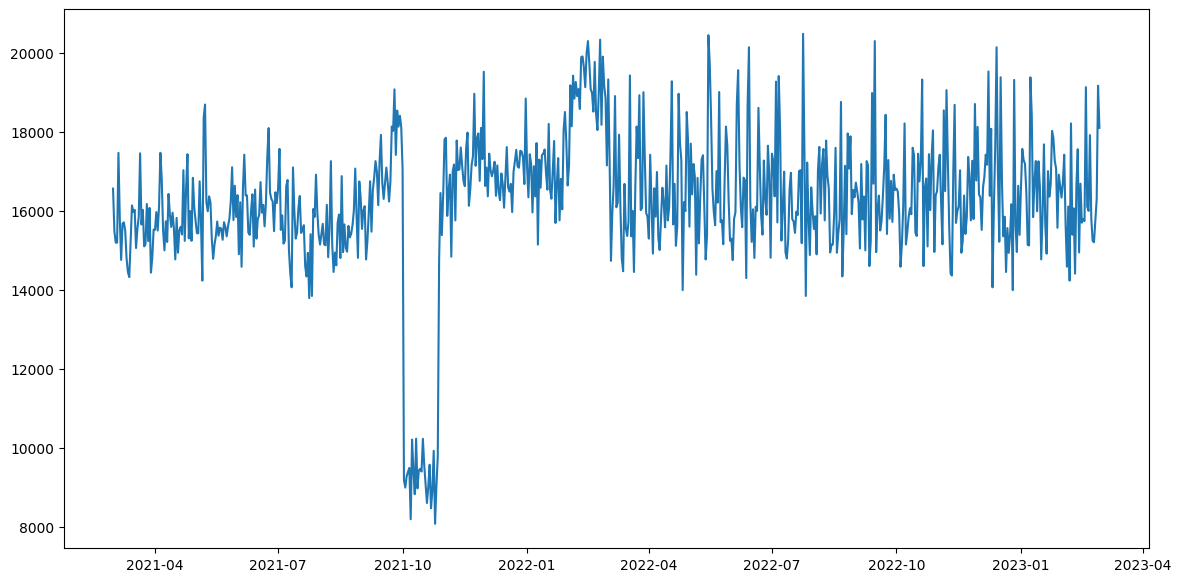

In [51]:
plt.figure(figsize=(14, 7))
plt.plot(data_ca_jour['jour_transaction'], data_ca_jour['CA_par_jour'])

plt.show()


**Moyenne mobile**

In [52]:
data_ca_jour['SMA30'] = data_ca_jour['CA_par_jour'].rolling(30).mean()  #Moyenne mobile simple 
data_ca_jour['CMA30'] = data_ca_jour['CA_par_jour'].expanding().mean()  #Moyenne mobile cumulée
data_ca_jour['EWMA30'] = data_ca_jour['CA_par_jour'].ewm(span=30).mean()   #Moyenne mobile exponentielle
display(data_ca_jour)

,jour_transaction,CA_par_jour,SMA30,CMA30,EWMA30
0,2021-03-01,16565.22,NaN,16565.220000,16565.220000
1,2021-03-02,15486.45,NaN,16025.835000,16007.855500
2,2021-03-03,15198.69,NaN,15750.120000,15719.959148
3,2021-03-04,15196.07,NaN,15611.607500,15575.608597
4,2021-03-05,17471.37,NaN,15983.560000,16006.940214
...,...,...,...,...,...
725,2023-02-24,15207.89,16238.370333,16231.937672,16247.661269
726,2023-02-25,15761.25,16188.068333,16231.290234,16216.279897
727,2023-02-26,16304.72,16162.444333,16231.391099,16221.985710
728,2023-02-27,19170.81,16282.368000,16235.423224,16412.232438


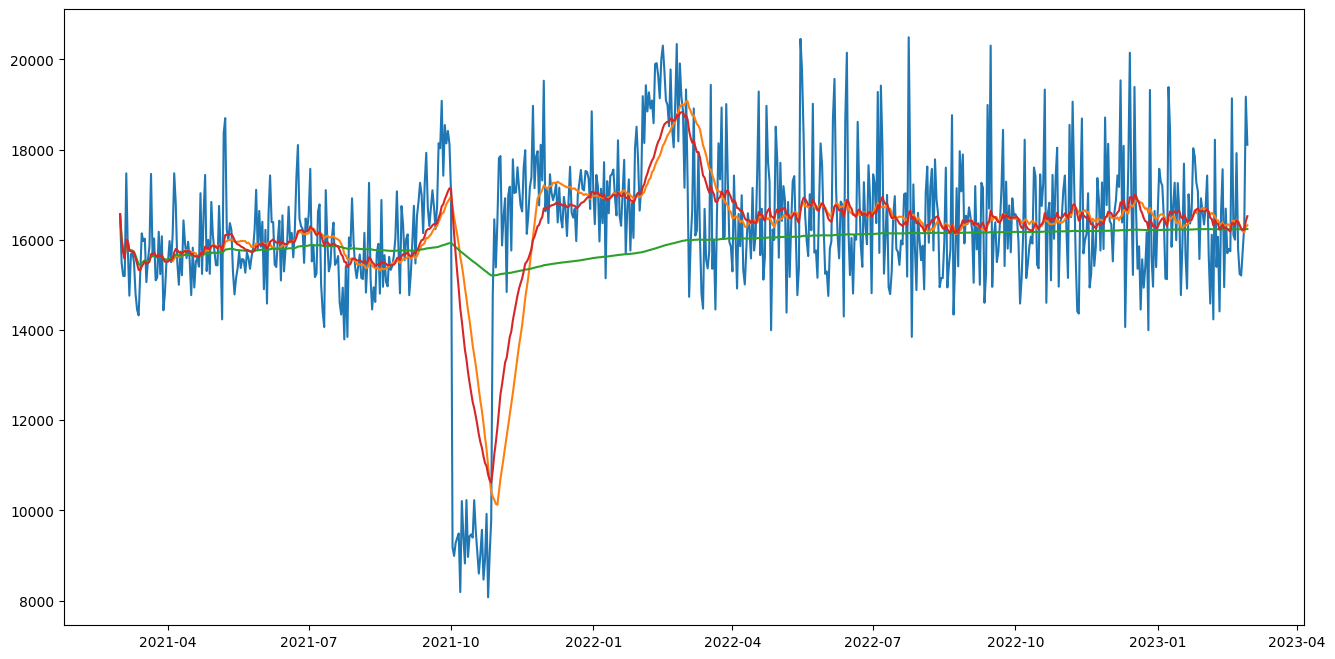

In [53]:
plt.figure(figsize=(16, 8))
plt.plot(data_ca_jour['jour_transaction'], data_ca_jour[['CA_par_jour','SMA30','CMA30', 'EWMA30']])
plt.show()

In [54]:
#CA par mois
data_ca_mois= data.groupby(['mois-annee'])[['price']].sum().reset_index()
display(data_ca_mois)

,mois-annee,price
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


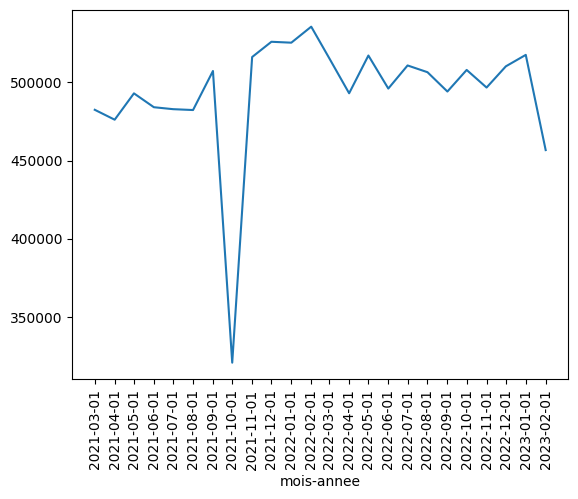

In [55]:
data_ca_mois['mois-annee']=data_ca_mois['mois-annee'].astype("datetime64")
data_ca_mois2= data_ca_mois.set_index('mois-annee')
plt.plot(data_ca_mois2['price'])
plt.xticks(ticks=data_ca_mois['mois-annee'], rotation=90, fontsize=10)
plt.xlabel('mois-annee')
plt.show()

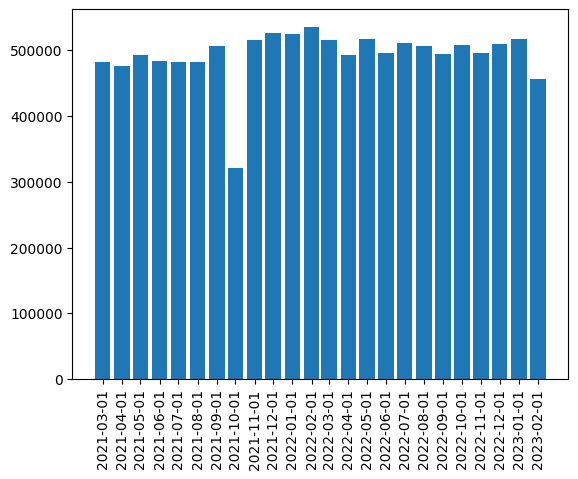

In [56]:
plt.bar(data_ca_mois['mois-annee'],data_ca_mois['price'], 25)
plt.xticks(ticks=data_ca_mois['mois-annee'], rotation=90, fontsize=10)
plt.show()


In [57]:
data_ca_mois['CA_cumulé']=data_ca_mois['price'].cumsum()
display(data_ca_mois)

,mois-annee,price,CA_cumulé
0,2021-03-01,482440.61,482440.61
1,2021-04-01,476109.30,958549.91
2,2021-05-01,492943.47,1451493.38
3,2021-06-01,484088.56,1935581.94
4,2021-07-01,482835.40,2418417.34
5,2021-08-01,482284.79,2900702.13
6,2021-09-01,507240.68,3407942.81
7,2021-10-01,320798.74,3728741.55
8,2021-11-01,516167.73,4244909.28
9,2021-12-01,525917.28,4770826.56


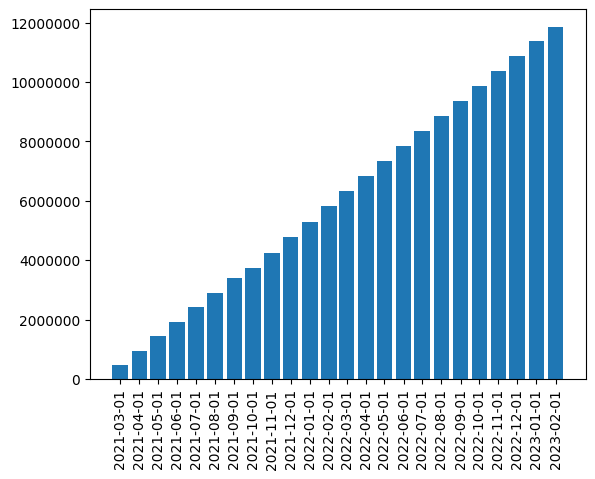

In [58]:
plt.ticklabel_format(style='plain')
plt.bar(data_ca_mois['mois-annee'],data_ca_mois['CA_cumulé'], 25)
plt.xticks(ticks=data_ca_mois['mois-annee'], rotation=90, fontsize=10)
plt.show()

In [59]:
#CA par année calendaire
data.groupby(data.date.dt.year)[['price']].sum()

,price
date,
2021,4770826.56
2022,6108681.81
2023,974220.31


In [60]:
#CA par année réels (2021-03 -- 2022-03 -- 2023-03)
CA_1_année= data_ca_mois['price'].iloc[:11].sum()
CA_2_année= data_ca_mois['price'].iloc[12:23].sum()
CA_2_ans=pd.DataFrame([('année 1',CA_1_année ), ('année 2',CA_2_année )], columns=['date', 'price'])
print(CA_1_année, CA_2_année)
display(CA_2_ans)

5296165.55 5565311.87


,date,price
0,année 1,5296165.55
1,année 2,5565311.87


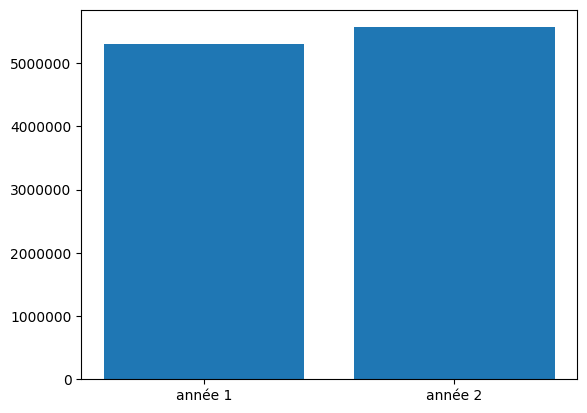

In [61]:
plt.ticklabel_format(style='plain')
plt.bar(x= CA_2_ans['date'], height= CA_2_ans['price'])
plt.xticks(CA_2_ans['date'], fontsize=10)
plt.show()

# **Profil des clients**

**Répartition hommes/femmes**

In [62]:
data_sex= data.groupby(['client_id','sex'])[['categ']].count().reset_index()
data_sex= data_sex.groupby('sex')[['categ']].count().reset_index()
display(data_sex)

,sex,categ
0,f,4479
1,m,4121


<BarContainer object of 2 artists>

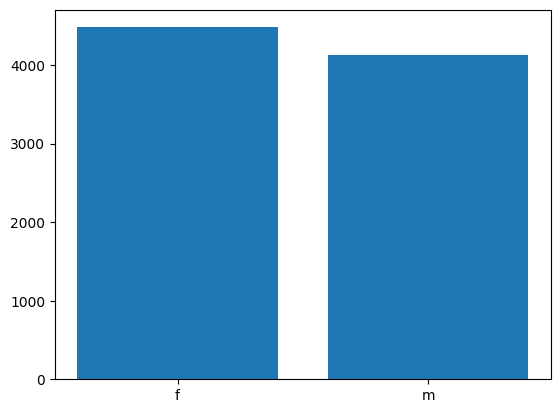

In [63]:
plt.bar(x=data_sex['sex'], height=data_sex['categ'])


**Répartition par age**

In [64]:
display(data['birth'].min())
display(data['birth'].max())

1929.0

2004.0

,client_id,birth,nombre_de_transactions_effectuées
0,c_1,1955.0,39
1,c_10,1956.0,58
2,c_100,1992.0,8
3,c_1000,1966.0,125
4,c_1001,1982.0,102
...,...,...,...
8595,c_995,1955.0,14
8596,c_996,1970.0,95
8597,c_997,1994.0,59
8598,c_998,2001.0,53


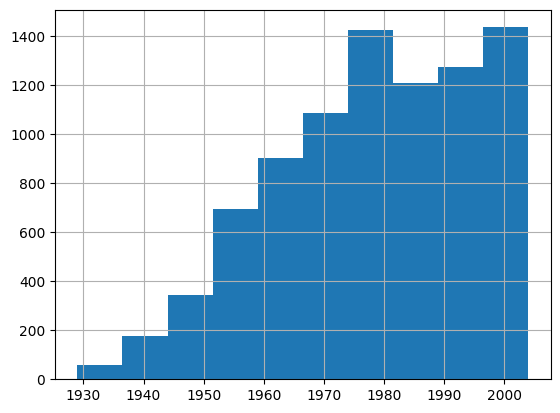

In [65]:
data_birth=data.groupby(['client_id','birth'])['id_prod'].count().reset_index()
data_birth.rename(columns={'id_prod': 'nombre_de_transactions_effectuées'}, inplace=True)
display(data_birth)
data_birth['birth'].hist(bins=10)
plt.show()

In [66]:
#Moyenne et médiane
a=2023-data_birth['birth'].mean()
b=2023-data_birth['birth'].median()
print(a, b)

44.73930232558132 44.0


In [67]:
cut_labels_10 = np.arange(1920, 2010, 10)
print(cut_labels_10)
data_birth['birth_periode']= pd.cut(data_birth['birth'], np.linspace(1920, 2010, 10), labels=cut_labels_10)
data_birth_period= data_birth.groupby('birth_periode')[['birth']].count().reset_index()
data_birth_period.rename(columns={'birth': 'bp_number'}, inplace=True)
display(data_birth_period)

[1920 1930 1940 1950 1960 1970 1980 1990 2000]


,birth_periode,bp_number
0,1920,7
1,1930,138
2,1940,379
3,1950,966
4,1960,1316
5,1970,1712
6,1980,1670
7,1990,1560
8,2000,852


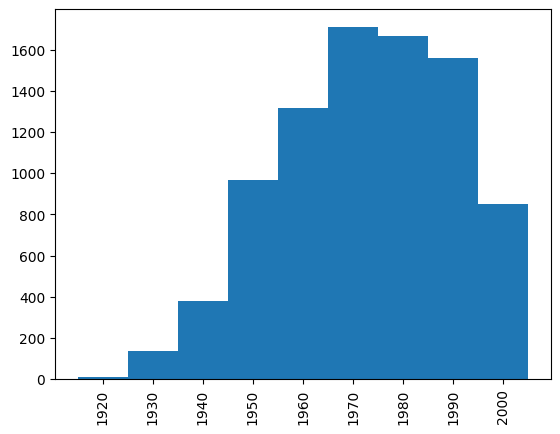

In [68]:
plt.bar(data_birth_period['birth_periode'], data_birth_period['bp_number'], 10)
plt.xticks(ticks=data_birth_period['birth_periode'], rotation=90, fontsize=10)
plt.show()

,client_id,birth,nombre_de_transactions_effectuées,birth_periode,age,cat
5265,c_5749,2004.0,21,2000,19.0,- 30
8245,c_8437,2004.0,11,2000,19.0,- 30
1212,c_2090,2004.0,70,2000,19.0,- 30
4501,c_5059,2004.0,10,2000,19.0,- 30
316,c_1284,2004.0,39,2000,19.0,- 30
...,...,...,...,...,...,...
2463,c_3218,1930.0,6,1920,93.0,60+
6910,c_7232,1930.0,164,1920,93.0,60+
5288,c_577,1929.0,115,1920,94.0,60+
4770,c_5302,1929.0,37,1920,94.0,60+


,cat,birth
0,- 30,2081
1,30-40,1645
2,40-50,1766
3,50-60,1450
4,60+,1658


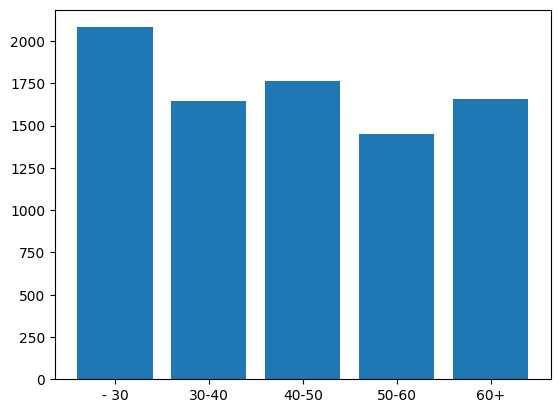

In [69]:
data_birth['age']=2023-data_birth['birth']
data_cat_age= data_birth.sort_values(by=['age'], ascending=True)
data_cat_age['cat'] = 0
data_cat_age.loc[data_cat_age['age'] <= 30, 'cat'] = '- 30'
data_cat_age.loc[(data_cat_age['age'] > 30) & (data_cat_age['age'] <= 40), 'cat'] = '30-40'
data_cat_age.loc[(data_cat_age['age'] > 40) & (data_cat_age['age'] <= 50), 'cat'] = '40-50'
data_cat_age.loc[(data_cat_age['age'] > 50) & (data_cat_age['age'] <= 60), 'cat'] = '50-60'
data_cat_age.loc[(data_cat_age['age'] > 60), 'cat'] = '60+'
display(data_cat_age)
data_cat_age_plot= data_cat_age.groupby('cat')[['birth']].count().reset_index()
display(data_cat_age_plot)
plt.bar(data_cat_age_plot['cat'], data_cat_age_plot['birth'])
plt.show()

**Chiffre d'affaires par client. Courbe de Lorentz**

8600


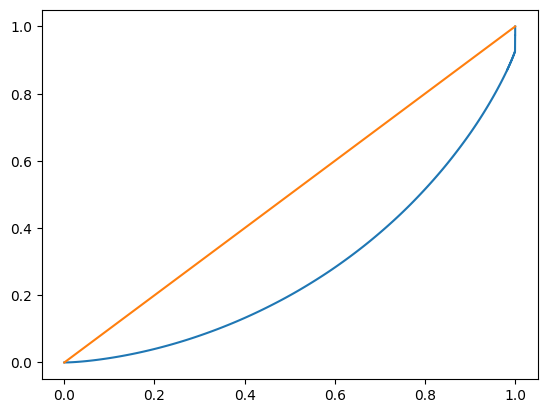

In [70]:
dep = data_ca_client['CA_par_client'].values
n = len(dep)
print(n)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.show()

# **Produits**

**CA par produit**

Les tops

In [71]:
data_ca_produit=data.groupby(['id_prod','categ'])['price'].sum().reset_index()
data_ca_produit.rename(columns={'price': 'CA_par_produit'}, inplace=True)
display(data_ca_produit.sort_values(by='CA_par_produit', ascending=False).head(10))

,id_prod,categ,CA_par_produit
3096,2_159,2.0,94893.50
3070,2_135,2.0,69334.95
3045,2_112,2.0,65407.76
3034,2_102,2.0,60736.78
3152,2_209,2.0,56971.86
2619,1_395,1.0,54356.25
2591,1_369,1.0,54025.48
3043,2_110,2.0,53846.25
3201,2_39,2.0,53060.85
3104,2_166,2.0,52449.12


Les flops

In [72]:
display(data_ca_produit.sort_values(by='CA_par_produit', ascending=True).head(10))

,id_prod,categ,CA_par_produit
595,0_1539,0.0,0.99
313,0_1284,0.0,1.38
719,0_1653,0.0,1.98
665,0_1601,0.0,1.99
2079,0_807,0.0,1.99
1784,0_541,0.0,1.99
802,0_1728,0.0,2.27
549,0_1498,0.0,2.48
2179,0_898,0.0,2.54
925,0_1840,0.0,2.56


In [73]:
#CA par catégorie
data_ca_produit_plot= data_ca_produit.groupby('categ')[['CA_par_produit']].sum().reset_index()
display(data_ca_produit_plot)

,categ,CA_par_produit
0,0.0,4419730.97
1,1.0,4653722.69
2,2.0,2780275.02


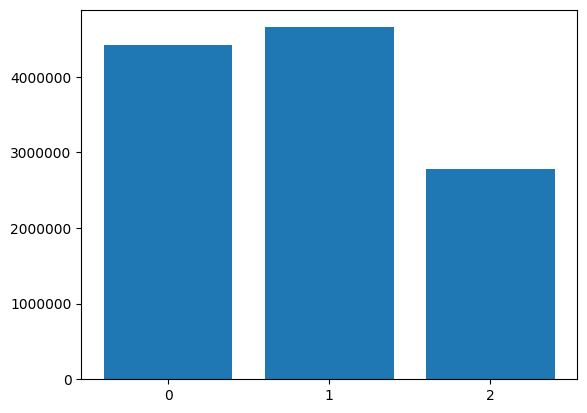

In [74]:
plt.ticklabel_format(style='plain')
plt.bar(data_ca_produit_plot['categ'], height=data_ca_produit_plot['CA_par_produit'])
plt.xticks(data_ca_produit_plot['categ'], ['0', '1', '2'])
plt.show()

# **Le lien entre le genre d’un client et les catégories des livres achetés**

In [75]:
#Chi2 et heatmap
X = "sex"
Y = "categ"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
Total,415459,227169,36483,679111


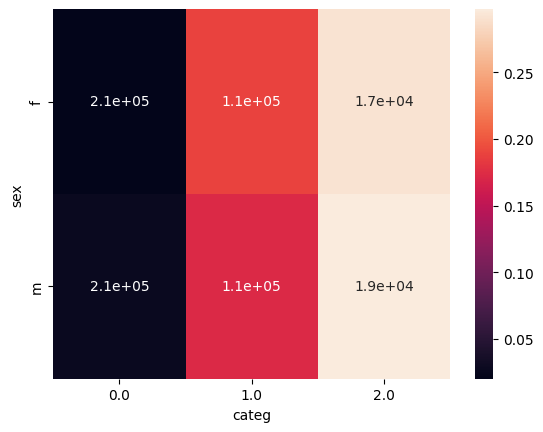

In [76]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [77]:
#Test statistique chi2-contingence
from scipy.stats import chi2_contingency
#chi2_contingency(table)
cont2= cont.iloc[[0,1],[0,1,2]]
display(cont2)
chi2_contingency(cont2)
#Статистика теста хи-квадрат: 147
#р-значение: 1,13e-32<0.05 ==>
#Степени свободы: 2 (рассчитывается как #rows-1 * #columns-1)
#Массив: последний массив отображает ожидаемые значения для каждой ячейки в таблице непредвиденных обстоятельств.
#критерий независимости хи-квадрат использует следующие нулевые и альтернативные гипотезы:
#H 0 : (нулевая гипотеза) Две переменные независимы.
#H 1 : (альтернативная гипотеза) Две переменные не являются независимыми.
#Поскольку p-значение теста меньше 0,05, мы можем отвергнуть нулевую гипотезу. Это означает, что у нас есть  доказательства, чтобы сказать, что существует связь между полом
# и предпочтениями категорий.
#Другими словами, предпочтения пола и категории книг зависят друг от друга.


categ,0.0,1.0,2.0
sex,,,
f,206103,114899,17283
m,209356,112270,19200


Chi2ContingencyResult(statistic=147.11906816131497, pvalue=1.1310980597090762e-32, dof=2, expected_freq=array([[206952.24759281, 113159.50583189,  18173.2465753 ],
       [208506.75240719, 114009.49416811,  18309.7534247 ]]))

Le test chi-2 de contingence (ou de l'indépendance) permet de vérifier si deux variables catégorielles sont indépendantes ou non. Les résultats du test passé sont les suivants:

La statistique du test chi-2 de contingence est de 147.12. Cela signifie que la différence entre les fréquences observées et les fréquences attendues n'est pas le résultat du hasard.

Le p-value du test est de 1.13e-32, ce qui est très petit. Cela signifie que la probabilité d'obtenir une différence aussi grande (ou plus grande) entre les fréquences observées et les fréquences attendues est très faible. En d'autres termes, on peut rejeter l'hypothèse nulle selon laquelle les deux variables sont indépendantes.

Le degré de liberté (dof) est de 2, ce qui signifie que le test a été effectué sur une table de contingence 2x3 (2 lignes et 3 colonnes).

Les fréquences attendues (expected_freq) sont les fréquences qui seraient attendues si les deux variables étaient indépendantes. Dans votre exemple, les fréquences attendues ont été calculées pour chaque cellule de la table de contingence en utilisant les marginales de la table de contingence.

En conclusion, les résultats indiquent que les deux variables catégorielles ne sont pas indépendantes et qu'il existe une association entre les deux. Cela peut être interprété comme une relation de dépendance entre les deux variables ou comme une influence de l'une sur l'autre. Cependant, il est important de noter que le test chi-2 ne permet pas de déterminer la nature de cette association ou de cette influence.

C'est-à-dire qu'il y a une corellation entre le genre et les catégoriedes livres achetés.


# **Le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés**

**Age <--> Montants total des achats**

In [78]:
data_ca_client['age']=2023-data['birth']
data_ca_client.sort_values(by='CA_par_client', ascending=False).head(10)

,client_id,sex,birth,CA_par_client,age
677,c_1609,m,1980.0,324033.35,55.0
4388,c_4958,m,1999.0,289760.34,49.0
6337,c_6714,f,1968.0,153598.92,32.0
2724,c_3454,m,1969.0,113637.93,27.0
2513,c_3263,f,1985.0,5276.87,38.0
634,c_1570,f,1979.0,5271.62,63.0
2108,c_2899,f,1994.0,5214.05,35.0
1268,c_2140,f,1977.0,5208.82,33.0
7006,c_7319,f,1974.0,5155.77,64.0
7715,c_7959,f,1974.0,5085.45,44.0


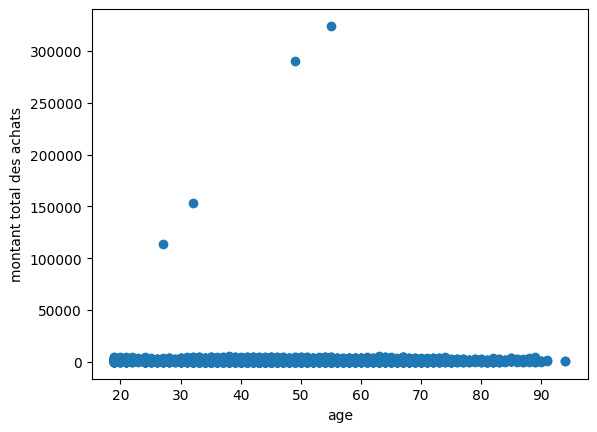

In [79]:
plt.plot(data_ca_client['age'], data_ca_client['CA_par_client'],'o')
plt.xlabel("age")
plt.ylabel("montant total des achats")
plt.show()

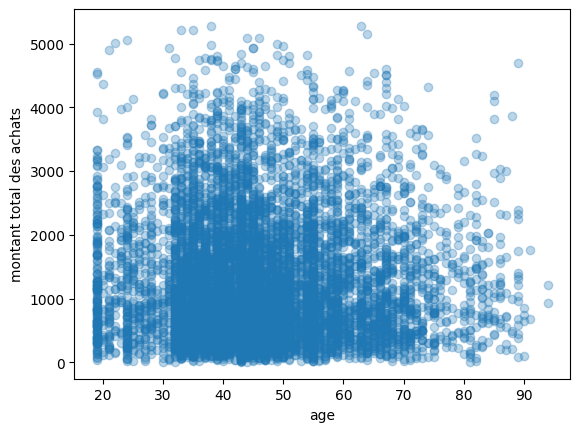

In [80]:
#J'enlève les 4 du tops
montant=data_ca_client[data_ca_client.CA_par_client < 6000]
plt.plot(montant['age'], montant['CA_par_client'],'o', alpha=0.3)
plt.xlabel("age")
plt.ylabel("montant total des achats")
plt.show()

*Coéfficiant de corrélation Pearson*

In [81]:

print(st.pearsonr(montant["age"],montant["CA_par_client"])[0])
print(np.cov(montant["age"],montant["CA_par_client"],ddof=0)[1,0])

-0.004969398382527497
-62.667183396196826


Le coeff Pearson -->0 ==> pas de corrélation, les variables sont indépendantes

En résumé, les résultats suggèrent qu'il existe une faible corrélation linéaire négative entre l'âge des clients et leur total d'achat dans une boutique, ce qui signifie que les clients plus âgés ne dépensent pas nécessairement plus d'argent dans la boutique. Cependant, il est important de prendre en compte les unités de mesure et de considérer qu'il peut y avoir des relations non linéaires qui n'ont pas été détectées par la corrélation de Pearson.

*Test de Spearman*

In [82]:
#Test adéquetion à la loi normale Shapiro-Wilk
from scipy.stats import shapiro

# Effectuer un test de Shapiro-Wilk
stat, p = shapiro(montant["age"])

# Afficher les résultats
print('Statistique de test :', stat)
print('p-valeur :', p)

# Interpréter les résultats
alpha = 0.05
if p > alpha:
    print('L\'échantillon suit une loi normale (fail to reject H0)')
else:
    print('L\'échantillon ne suit pas une loi normale (reject H0)')

Statistique de test : 0.97187739610672
p-valeur : 5.908292473055183e-38
L'échantillon ne suit pas une loi normale (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [83]:
#Test adéquetion à la loi normale Shapiro-Wilk
from scipy.stats import shapiro

# Effectuer un test de Shapiro-Wilk
stat, p = shapiro(montant["CA_par_client"])

# Afficher les résultats
print('Statistique de test :', stat)
print('p-valeur :', p)

# Interpréter les résultats
alpha = 0.05
if p > alpha:
    print('L\'échantillon suit une loi normale (fail to reject H0)')
else:
    print('L\'échantillon ne suit pas une loi normale (reject H0)')

Statistique de test : 0.903691828250885
p-valeur : 0.0
L'échantillon ne suit pas une loi normale (reject H0)


In [84]:
st.spearmanr(data_ca_client['age'], data_ca_client['CA_par_client'])

SignificanceResult(statistic=-0.006415436184221663, pvalue=0.5519352403352894)

Le test de Spearman est utilisé pour évaluer la corrélation entre deux variables ordinales ou deux variables continues transformées en rangs. Dans notre exemple, les résultats du test de Spearman sont les suivants:

Le coefficient de corrélation de Spearman (statistic) est de -0.0064. Ce coefficient mesure la force et la direction de la corrélation entre les deux variables. Dans ce cas, la valeur est très proche de zéro, ce qui indique une corrélation très faible.

Le p-value du test est de 0.55. Cette valeur mesure la probabilité d'obtenir une corrélation aussi extrême (ou plus extrême) entre les deux variables si elles étaient en fait non corrélées. Une p-value élevée indique que la corrélation observée n'est pas statistiquement significative, c'est-à-dire qu'elle pourrait être due au hasard.

En conclusion, les résultats suggèrent qu'il n'y a pas de corrélation significative entre les deux variables. Cela signifie que les variations dans l'une des variables ne sont pas associées à des variations dans l'autre variable. Cependant, il est important de noter que l'absence de corrélation ne signifie pas nécessairement qu'il n'y a pas de relation entre les deux variables. Il est possible que d'autres types de tests ou analyses soient nécessaires pour explorer davantage la relation entre ces deux variables.

**Age <--> fréquence d'achats**

In [85]:
data['age']=2023-data['birth']
data_trans_mois= data.groupby(['client_id','age','mois-annee'])[['id_transaction']].count().reset_index()
data_trans_mois.rename(columns={'id_transaction': 'nombre_de_transation_par_mois'}, inplace=True)
display(data_trans_mois)

,client_id,age,mois-annee,nombre_de_transation_par_mois
0,c_1,68.0,2021-06,1
1,c_1,68.0,2021-07,4
2,c_1,68.0,2021-08,1
3,c_1,68.0,2021-09,2
4,c_1,68.0,2021-10,1
...,...,...,...,...
137129,c_999,59.0,2022-10,1
137130,c_999,59.0,2022-11,2
137131,c_999,59.0,2022-12,1
137132,c_999,59.0,2023-01,5


In [86]:
data_trans_frequence= data_trans_mois.groupby(['client_id','age'])[['nombre_de_transation_par_mois']].mean().reset_index()
data_trans_frequence.rename(columns={'nombre_de_transation_par_mois': 'fréquence_achats_par_mois'}, inplace=True)
data_trans_frequence.sort_values(by='fréquence_achats_par_mois', ascending=False).head(10)

,client_id,age,fréquence_achats_par_mois
677,c_1609,43.0,1062.000000
6337,c_6714,55.0,382.791667
2724,c_3454,54.0,282.208333
4388,c_4958,24.0,216.458333
1268,c_2140,46.0,17.478261
2513,c_3263,38.0,16.791667
1772,c_2595,49.0,16.583333
1197,c_2077,39.0,16.000000
708,c_1637,35.0,15.833333
7120,c_7421,45.0,15.791667


In [87]:
data_trans_frequence.sort_values(by='fréquence_achats_par_mois', ascending=True).head(10)

,client_id,age,fréquence_achats_par_mois
6750,c_7089,21.0,1.0
7382,c_7659,28.0,1.0
6185,c_6578,31.0,1.0
3855,c_4478,53.0,1.0
3843,c_4467,30.0,1.0
7935,c_8156,28.0,1.0
6222,c_6610,23.0,1.0
920,c_1828,19.0,1.0
3810,c_4436,30.0,1.0
6156,c_6551,20.0,1.0


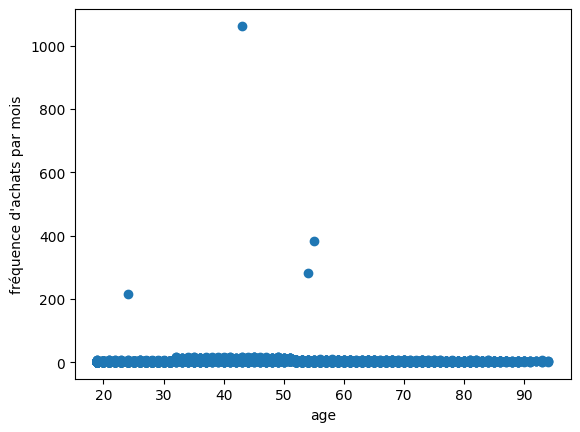

In [88]:
plt.plot(data_trans_frequence['age'], data_trans_frequence['fréquence_achats_par_mois'],'o')
plt.xlabel("age")
plt.ylabel("fréquence d\'achats par mois")
plt.show()

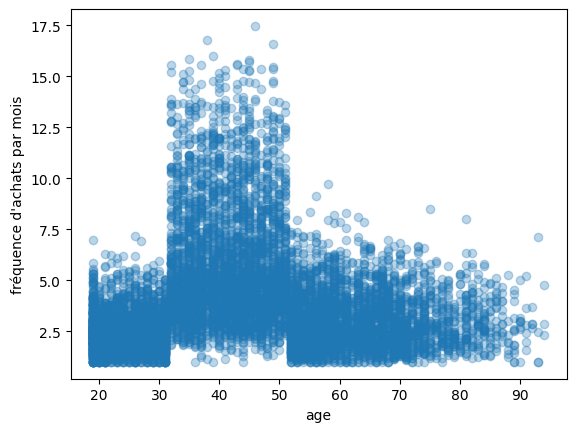

In [89]:
frequence=data_trans_frequence[data_trans_frequence.fréquence_achats_par_mois < 18]
plt.plot(frequence['age'], frequence['fréquence_achats_par_mois'],'o', alpha=0.3)
plt.xlabel("age")
plt.ylabel("fréquence d\'achats par mois")
plt.show()

In [90]:

print(st.pearsonr(data_trans_frequence["age"],data_trans_frequence['fréquence_achats_par_mois'])[0])
print(np.cov(data_trans_frequence["age"],data_trans_frequence['fréquence_achats_par_mois'],ddof=0)[1,0])

-0.0042140934017161
-0.9219502784465605


**Age <--> la taille du panier moyen**

In [91]:
display(data)
data.groupby('date')[['price']].sum().reset_index()
data_montant_panier= data.groupby(['session_id','client_id','age'])[['price']].sum().reset_index()
data_montant_panier= data_montant_panier.groupby(['client_id','age'])[['price']].mean().reset_index()
data_montant_panier.rename(columns={'price': 'moyenne de montant de panier'}, inplace=True)
display(data_montant_panier)

,id_transaction,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge,jour_transaction,mois-annee,annee,age
0,0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,both,2022-05-20,2022-05,2022,37.0
1,1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,both,2021-07-20,2021-07,2021,37.0
2,2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,both,2022-08-20,2022-08,2022,37.0
3,3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,both,2021-05-09,2021-05,2021,55.0
4,4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,both,2022-05-30,2022-05,2022,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,679327,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945.0,35.24,1.0,both,2023-01-26,2023-01,2023,78.0
679328,679328,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945.0,35.24,1.0,both,2022-11-26,2022-11,2022,78.0
679329,679329,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945.0,35.24,1.0,both,2021-09-26,2021-09,2021,78.0
679330,679330,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993.0,86.99,2.0,both,2022-02-19,2022-02,2022,30.0


,client_id,age,moyenne de montant de panier
0,c_1,68.0,16.914545
1,c_10,67.0,39.811765
2,c_100,31.0,50.970000
3,c_1000,57.0,24.321398
4,c_1001,41.0,38.571489
...,...,...,...
8595,c_995,68.0,21.045556
8596,c_996,53.0,20.576962
8597,c_997,29.0,62.083750
8598,c_998,22.0,120.864348


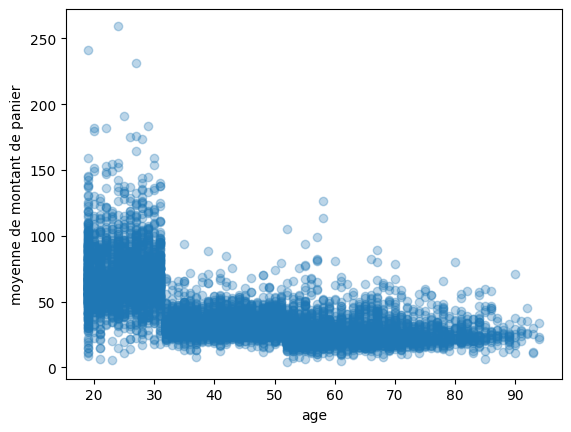

In [92]:
plt.plot(data_montant_panier['age'], data_montant_panier['moyenne de montant de panier'],'o', alpha=0.3)
plt.xlabel("age")
plt.ylabel("moyenne de montant de panier")
plt.show()

**Age <--> les catégories des livres achetés**

In [93]:
data_categorie= data.groupby(['client_id','age','categ'])[['price']].count().reset_index()
data_categorie.rename(columns={'price': 'nombre d achats'}, inplace=True)
display(data_categorie)

,client_id,age,categ,nombre d achats
0,c_1,68.0,0.0,30
1,c_1,68.0,1.0,8
2,c_1,68.0,2.0,1
3,c_10,67.0,0.0,20
4,c_10,67.0,1.0,34
...,...,...,...,...
19941,c_998,22.0,0.0,14
19942,c_998,22.0,1.0,11
19943,c_998,22.0,2.0,28
19944,c_999,59.0,0.0,19


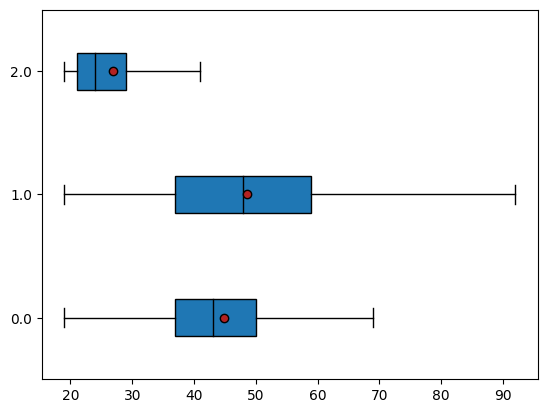

In [94]:
#ANOVA (quantitative/qualitative)
#Il y a avait des NAN comme catégorie qui est du au produit sans prix ni catégorie
#https://colab.research.google.com/drive/1l8q2ksQ0bo_EzrV52gCbXEdM8KLMOG6y?authuser=1#scrollTo=_XrJVEHt2C9L&line=2&uniqifier=1
X = "categ" # qualitative
Y = "age" # quantitative

sous_echantillon = data
modalites = sous_echantillon[X].dropna().unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()


Test statistique: 1 variable qualitative ('catégorie des livres achetés') et 1 variable quantitative ('age')


In [95]:
#Test adéquetion à la loi normale Shapiro-Wilk
from scipy.stats import shapiro

categorie0= data['age'].loc[data['categ']==0.0]
categorie1= data['age'].loc[data['categ']==1.0]
categorie2= data['age'].loc[data['categ']==2.0]

# Effectuer un test de Shapiro-Wilk
stat, p = shapiro(categorie0)

# Afficher les résultats
print('Statistique de test :', stat)
print('p-valeur :', p)

# Interpréter les résultats
alpha = 0.05
if p > alpha:
    print('L\'échantillon suit une loi normale (fail to reject H0)')
else:
    print('L\'échantillon ne suit pas une loi normale (reject H0)')

Statistique de test : 0.9367274045944214
p-valeur : 0.0
L'échantillon ne suit pas une loi normale (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [96]:
# Effectuer un test de Shapiro-Wilk
stat, p = shapiro(categorie1)

# Afficher les résultats
print('Statistique de test :', stat)
print('p-valeur :', p)

# Interpréter les résultats
alpha = 0.05
if p > alpha:
    print('L\'échantillon suit une loi normale (fail to reject H0)')
else:
    print('L\'échantillon ne suit pas une loi normale (reject H0)')

Statistique de test : 0.9893467426300049
p-valeur : 0.0
L'échantillon ne suit pas une loi normale (reject H0)


In [97]:
# Effectuer un test de Shapiro-Wilk
stat, p = shapiro(categorie2)

# Afficher les résultats
print('Statistique de test :', stat)
print('p-valeur :', p)

# Interpréter les résultats
alpha = 0.05
if p > alpha:
    print('L\'échantillon suit une loi normale (fail to reject H0)')
else:
    print('L\'échantillon ne suit pas une loi normale (reject H0)')

Statistique de test : 0.6679463386535645
p-valeur : 0.0
L'échantillon ne suit pas une loi normale (reject H0)


la variable ne  suit pas une distribution normale donc on choisi un test non paramètrique

In [98]:
from scipy.stats import kruskal

# Effectuer le test de Kruskal-Wallis
stat, p = kruskal(categorie0, categorie1, categorie2)

# Afficher les résultats
print('Test de Kruskal-Wallis pour une variable qualitative à trois variantes et une variable quantitative')
print('Nombre d\'observations pour chaque groupe :', len(categorie0), len(categorie1), len(categorie2))
print('Moyenne du groupe 1 :', np.mean(categorie0))
print('Moyenne du groupe 2 :', np.mean(categorie1))
print('Moyenne du groupe 3 :', np.mean(categorie2))
print('Statistique de test :', stat)
print('Valeur de p :', p)

# Interpréter les résultats
alpha = 0.05
if p < alpha:
    print('Il y a une différence statistiquement significative entre les groupes.')
else:
    print('Il n\'y a pas de différence statistiquement significative entre les groupes.')


Test de Kruskal-Wallis pour une variable qualitative à trois variantes et une variable quantitative
Nombre d'observations pour chaque groupe : 415459 227169 36483
Moyenne du groupe 1 : 44.89744595736282
Moyenne du groupe 2 : 48.65123762485198
Moyenne du groupe 3 : 26.94803058958967
Statistique de test : 79346.09938564085
Valeur de p : 0.0
Il y a une différence statistiquement significative entre les groupes.


Les variables ne sont pas indépendantes. Cela signifie que la variable qualitative à trois variantes a un effet significatif sur la variable quantitative.

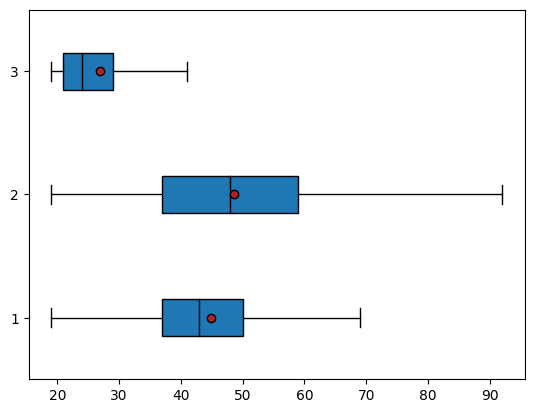

In [99]:
plt.boxplot([categorie0, categorie1, categorie2], showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

# **Genre et chiffre d'affaires**

In [100]:
display(data_ca_client)
CA_genre= data_ca_client[['sex','CA_par_client']].groupby(by=data_ca_client['sex']).sum().reset_index()
display(CA_genre)

,client_id,sex,birth,CA_par_client,age
0,c_1,m,1955.0,558.18,37.0
1,c_10,m,1956.0,1353.60,37.0
2,c_100,m,1992.0,254.85,37.0
3,c_1000,f,1966.0,2261.89,55.0
4,c_1001,m,1982.0,1812.86,55.0
...,...,...,...,...,...
8595,c_995,m,1955.0,189.41,70.0
8596,c_996,f,1970.0,1625.58,44.0
8597,c_997,f,1994.0,1490.01,44.0
8598,c_998,m,2001.0,2779.88,65.0


<ipython-input-100-5d0419ad1835>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CA_genre= data_ca_client[['sex','CA_par_client']].groupby(by=data_ca_client['sex']).sum().reset_index()


,sex,CA_par_client
0,f,5859683.13
1,m,5994045.55


**Test statistique**

In [101]:
from scipy.stats import mannwhitneyu
femmes = data_ca_client['CA_par_client'].loc[data_ca_client['sex']=="f"]
hommes = data_ca_client['CA_par_client'].loc[data_ca_client['sex']=="m"]
display(femmes)
display(hommes)
#Test adéquetion à la loi normale Shapiro-Wilk
from scipy.stats import shapiro

# Effectuer un test de Shapiro-Wilk
stat, p = shapiro(femmes)

# Afficher les résultats
print('Statistique de test :', stat)
print('p-valeur :', p)

# Interpréter les résultats
alpha = 0.05
if p > alpha:
    print('L\'échantillon suit une loi normale (fail to reject H0)')
else:
    print('L\'échantillon ne suit pas une loi normale (reject H0)')


3       2261.89
5        415.78
8        844.93
10       424.97
12       513.82
         ...   
8587    1601.34
8592     320.00
8594     968.27
8596    1625.58
8597    1490.01
Name: CA_par_client, Length: 4479, dtype: float64

0        558.18
1       1353.60
2        254.85
4       1812.86
6       1209.84
         ...   
8591     753.55
8593     470.31
8595     189.41
8598    2779.88
8599     701.40
Name: CA_par_client, Length: 4121, dtype: float64

Statistique de test : 0.17533636093139648
p-valeur : 0.0
L'échantillon ne suit pas une loi normale (reject H0)


In [102]:
#Test adéquetion à la loi normale Shapiro-Wilk
from scipy.stats import shapiro

# Effectuer un test de Shapiro-Wilk
stat, p = shapiro(hommes)

# Afficher les résultats
print('Statistique de test :', stat)
print('p-valeur :', p)

# Interpréter les résultats
alpha = 0.05
if p > alpha:
    print('L\'échantillon suit une loi normale (fail to reject H0)')
else:
    print('L\'échantillon ne suit pas une loi normale (reject H0)')


Statistique de test : 0.04743373394012451
p-valeur : 0.0
L'échantillon ne suit pas une loi normale (reject H0)


In [103]:

# Effectuer le test de Mann-Whitney
stat, p = mannwhitneyu(femmes, hommes)

# Afficher les résultats
print('Test de Mann-Whitney pour une variable qualitative et une variable quantitative')
print('Nombre de femmes :', len(femmes))
print('Nombre d\'hommes :', len(hommes))
print('Moyenne de chiffre d\'affaires des femmes :', np.mean(femmes))
print('Moyenne de chiffre d\'affaires des hommes :', np.mean(hommes))
print('Statistique de test :', stat)
print('Valeur de p :', p)

# Interpréter les résultats
alpha = 0.05
if p < alpha:
    print('Il y a une différence statistiquement significative entre les chiffres d\'affaires des femmes et des hommes.')
else:
    print('Il n\'y a pas de différence statistiquement significative entre les chiffres d\'affaires des femmes et des hommes.')



Test de Mann-Whitney pour une variable qualitative et une variable quantitative
Nombre de femmes : 4479
Nombre d'hommes : 4121
Moyenne de chiffre d'affaires des femmes : 1308.2570060281312
Moyenne de chiffre d'affaires des hommes : 1454.5123877699587
Statistique de test : 9225797.5
Valeur de p : 0.9779331204811007
Il n'y a pas de différence statistiquement significative entre les chiffres d'affaires des femmes et des hommes.
